 # Cardiovascular Diseases
 # Heart Failure Prediction - Feature Importances

    
   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives
   each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this
   dataset contains 12 features that can be used to predict mortality by heart failure.

   Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

   People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk
   factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and
   management wherein a machine learning model can be of great help.
    
![heart_anatomy.jpg](attachment:heart_anatomy.jpg)
    
 ## Dataset Link

[1] https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2

[2] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001#sec010

 ## Dataset Description

 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**

 ### References

    Machine learning can predict survival of patients with heart failure from serum creatinine and
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

### Required Libraries and Utilities

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import shap

In [4]:
from ReusableUtils import ReusableUtils
utils = ReusableUtils()

### Set Notebook Configuration Parameters

In [5]:
utils.setNotebookConfigParams()

/content/ReusableUtils.py:59: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



### Utility Functions

In [6]:
def PrintDataFeatures(data_features):
    print('Data Feature Code:')
    print('------------------')

    for k, v in data_features.items():
        print(k, v)

    print('\n------------------------\n')
    print('Data Feature Importances\n------------------------')

### Import Data

In [8]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = './heart_failure_clinical_records_dataset.csv',
                                 low_memory = False,
                                 skipinitialspace = True,
                                 float_precision = 'round_trip')

heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
heart_faliure_data.shape

(299, 13)

In [10]:
heart_faliure_data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [11]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


***This looks to be a clean dataset without any missing values...***

In [12]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Data Preparation

### Test - Train Split

In [13]:
X = heart_faliure_data[['age', 'ejection_fraction',
                        'serum_creatinine', 'serum_sodium',
                        'platelets', 'creatinine_phosphokinase']]

# X = heart_faliure_data[['age', 'ejection_fraction',
#                         'serum_creatinine', 'serum_sodium']]

# X = heart_faliure_data.drop(['DEATH_EVENT', 'time'], axis = 1)

# X = heart_faliure_data[['age','ejection_fraction','serum_sodium']]

y = heart_faliure_data[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.90,
                                                    test_size = 0.10,
                                                    random_state = 109)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (269, 6)
Y_Train Shape: (269, 1)
X_Test Shape: (30, 6)
Y_Test Shape: (30, 1)


#### Data Value Counts

In [14]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({np.int64(0): 186, np.int64(1): 83})


#### <font color = brown>Data Insight 17:</font>

**`1. As we see in the training data, the number of 1s (83 - Death Event) are much less comapred to the number of 0s (171 - Survival Case). This is also confirmed in the Data Insight 15.`**

**`2. With this imbalance dataset (67.89% survival cases & 32.11% death events), the model could become more inclined towards learnign and predicting the negative examples than the positive (death) cases.`**

**`3. To avoid this scenario and create an un-biased model, the dataset should be balanced where we need to generate more  examples of the minority class. We will apply the Synthetic Minority Oversampling Technique (SMOTE) algorithm on the training data such that more examples of the death events are generated and we have a balanced dataset.`**

In [15]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({np.int64(0): 186, np.int64(1): 83})


In [16]:
data_features = dict(enumerate(X.columns))
data_features

{0: 'age',
 1: 'ejection_fraction',
 2: 'serum_creatinine',
 3: 'serum_sodium',
 4: 'platelets',
 5: 'creatinine_phosphokinase'}

#### Synthetic Minority Oversampling Technique (SMOTE)

In [17]:
# Implement SMOTE
sampling = SMOTE(random_state = 100)
X_train, y_train = sampling.fit_resample(X_train.values, y_train.values.ravel())

# Shuffle the data
perms = np.random.permutation(X_train.shape[0])
X_train = X_train[perms]
y_train = y_train[perms]

X_train = pd.DataFrame(data = X_train)
y_train = pd.DataFrame(data = y_train)

print(X_train.shape)
print(y_train.shape)

(372, 6)
(372, 1)


In [18]:
X_temp = pd.DataFrame(data = X_train)
y_temp = pd.DataFrame(data = y_train)

In [19]:
print('Resampled dataset shape %s' % Counter(y_train.values.ravel()))
print('Test dataset shape %s' % Counter(y_test.values.ravel()))

Resampled dataset shape Counter({np.int64(1): 186, np.int64(0): 186})
Test dataset shape Counter({np.int64(0): 17, np.int64(1): 13})


#### <font color = brown>Data Balancing Significance</font>

**`1. With the application of SMOTE on the training data, the number of 1s (Death Event) are now equal to the number of 0s (Survival Case) with each 171 records respectively.`**

- **2. This will ensure  -**
    - 2.1 There are equal data points for both positive and negative scenarios and we have a balanced dataset.
    - 2.2 The model will not be biased during training phase by seeing more example of Survival scenarios.


### Data Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Feature Importances

## <font color = Green>Mutual Information</font>

Estimate mutual information for a discrete target variable.

Mutual Information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Mathematically, Mutual Information is defined as -

### <font color = Green>Discrete Distributions</font>
The mutual information of two **jointly discrete random variables X** and **Y** is calculated as a double sum:

\begin{align}
{I(X;Y) =\sum_{y \in Y}\sum_{x \in X}p_{X, Y}(x, y)log\Bigg( \frac {p_{X, Y}(x, y)}{p_X(x)p_Y(y)} \Bigg)}
\end{align}

where, **P<sub>{X,Y}</sub>** is the joint probability mass function of **X** and **Y**, and **P<sub>X</sub>** and **P<sub>Y</sub>** are the marginal probability mass functions of **X** and **Y** respectively.

### <font color = Green>Continuous Distributions</font>

In the case of jointly continuous random variables, the double sum is replaced by a double integral.

\begin{align}
{I(X;Y) =\int_{y}\int_{x}p_{X, Y}(x, y)log\Bigg( \frac {p_{X, Y}(x, y)}{p_X(x)p_Y(y)} \Bigg)dx dy}
\end{align}

where, **P<sub>{X,Y}</sub>** is the joint probability mass function of **X** and **Y**, and **P<sub>X</sub>** and **P<sub>Y</sub>** are the marginal probability density functions of **X** and **Y** respectively.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Ref:
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
2. https://en.wikipedia.org/wiki/Mutual_information

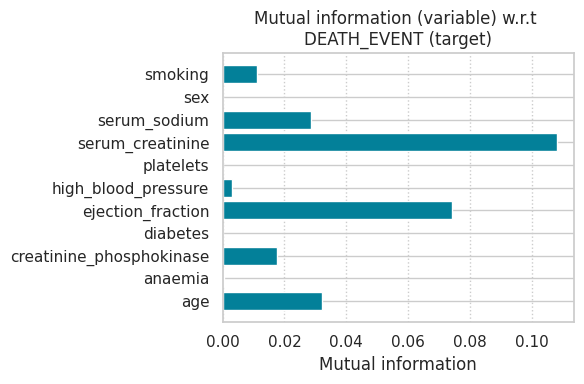

In [21]:
from sklearn.feature_selection import mutual_info_classif

MI_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
               'ejection_fraction', 'high_blood_pressure', 'platelets',
               'serum_creatinine', 'serum_sodium', 'sex', 'smoking']

mutual_infos = (mutual_info_classif(X=heart_faliure_data[MI_features],
                                    y=heart_faliure_data["DEATH_EVENT"],
                                    n_neighbors=20,
                                    discrete_features=[False, False, False, True, False,
                                                     True, False, False, False, True, False],
                                    random_state=42))

plt.figure(figsize=(6, 4))
plt.barh(y=MI_features, width=mutual_infos, color="#038099")
plt.title("Mutual information (variable) w.r.t \nDEATH_EVENT (target)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

### <font color = Red>Insight:</font>

**serum_creatinine**, **ejection_fraction**, and **age** turn out to be containing the highest amount of information and the death event is highly dependent on these parameters.

## ML Models and Respective Feature Importances

To extract the feature importances each ML algorithm assigns, we will train models based on different algorithms and then analyze their feature importance scored. The classifiers to be used in this study will be -

**`1. Support Vector Machines with RBF kernel`**

**`2. Decision Tree`**

**`3. Random Forest`**

**`4. Gradient Boosting - XGBoost`**

**`5. Light GBM`**

## 1. Support Vector Machines with Linear kernel

In [22]:
# SVM with Default Parameters and linear kernel
# SVM assigns feature importances with linear kernel.
# coef_ : Weights assigned to the features when kernel="linear".
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.coef_

svm = SVC(kernel = 'linear', probability = True, random_state = 100)
svm = svm.fit(X_train, y_train.values.ravel())

### Feature Importances

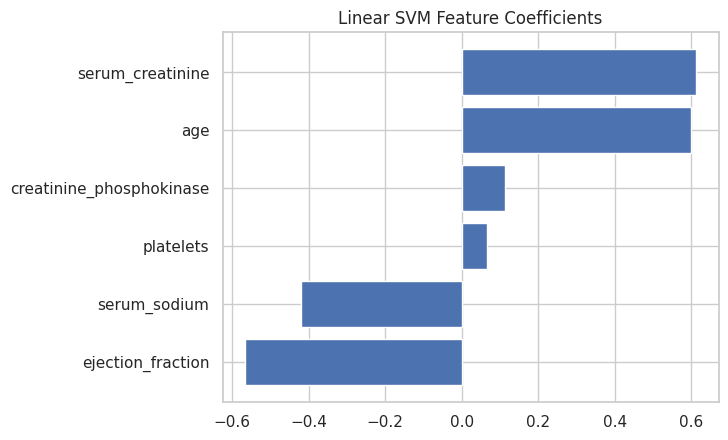

In [23]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Linear SVM Feature Coefficients")
    plt.show()

feat_names = list(data_features.values())
f_importances(svm.coef_[0], feat_names)

['age',
 'ejection_fraction',
 'serum_creatinine',
 'serum_sodium',
 'platelets',
 'creatinine_phosphokinase']

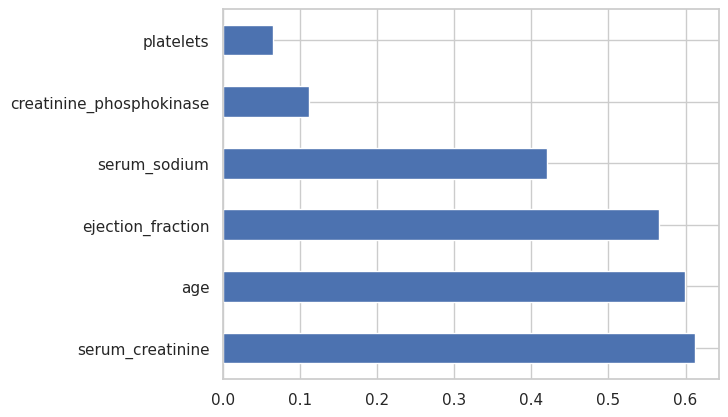

In [24]:
pd.Series(abs(svm.coef_[0]), index=feat_names).nlargest(10).plot(kind='barh')
feat_names

### <font color = Red>Insight:</font>

**serum_creatinine**, **ejection_fraction**, and **age** turn out to be containing the highest amount of information and the death event is highly dependent on these parameters.

## 2. Decision Tree

In [25]:
# GridSearchCV to find the optimal tree parameters
dt1 = tree.DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30),
#               "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object
tree_grid = RandomizedSearchCV(dt1, param_grid, cv = 5)

# fitting the model for grid search
tree_grid.fit(X_train, y_train.values.ravel())

# get the best parameter from gird search
print("Best Parameters:", tree_grid.best_params_)

# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", tree_grid.best_estimator_)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 8}

Best Classifier: DecisionTreeClassifier(max_depth=4, min_samples_split=8, random_state=100)


## Tree Visualization

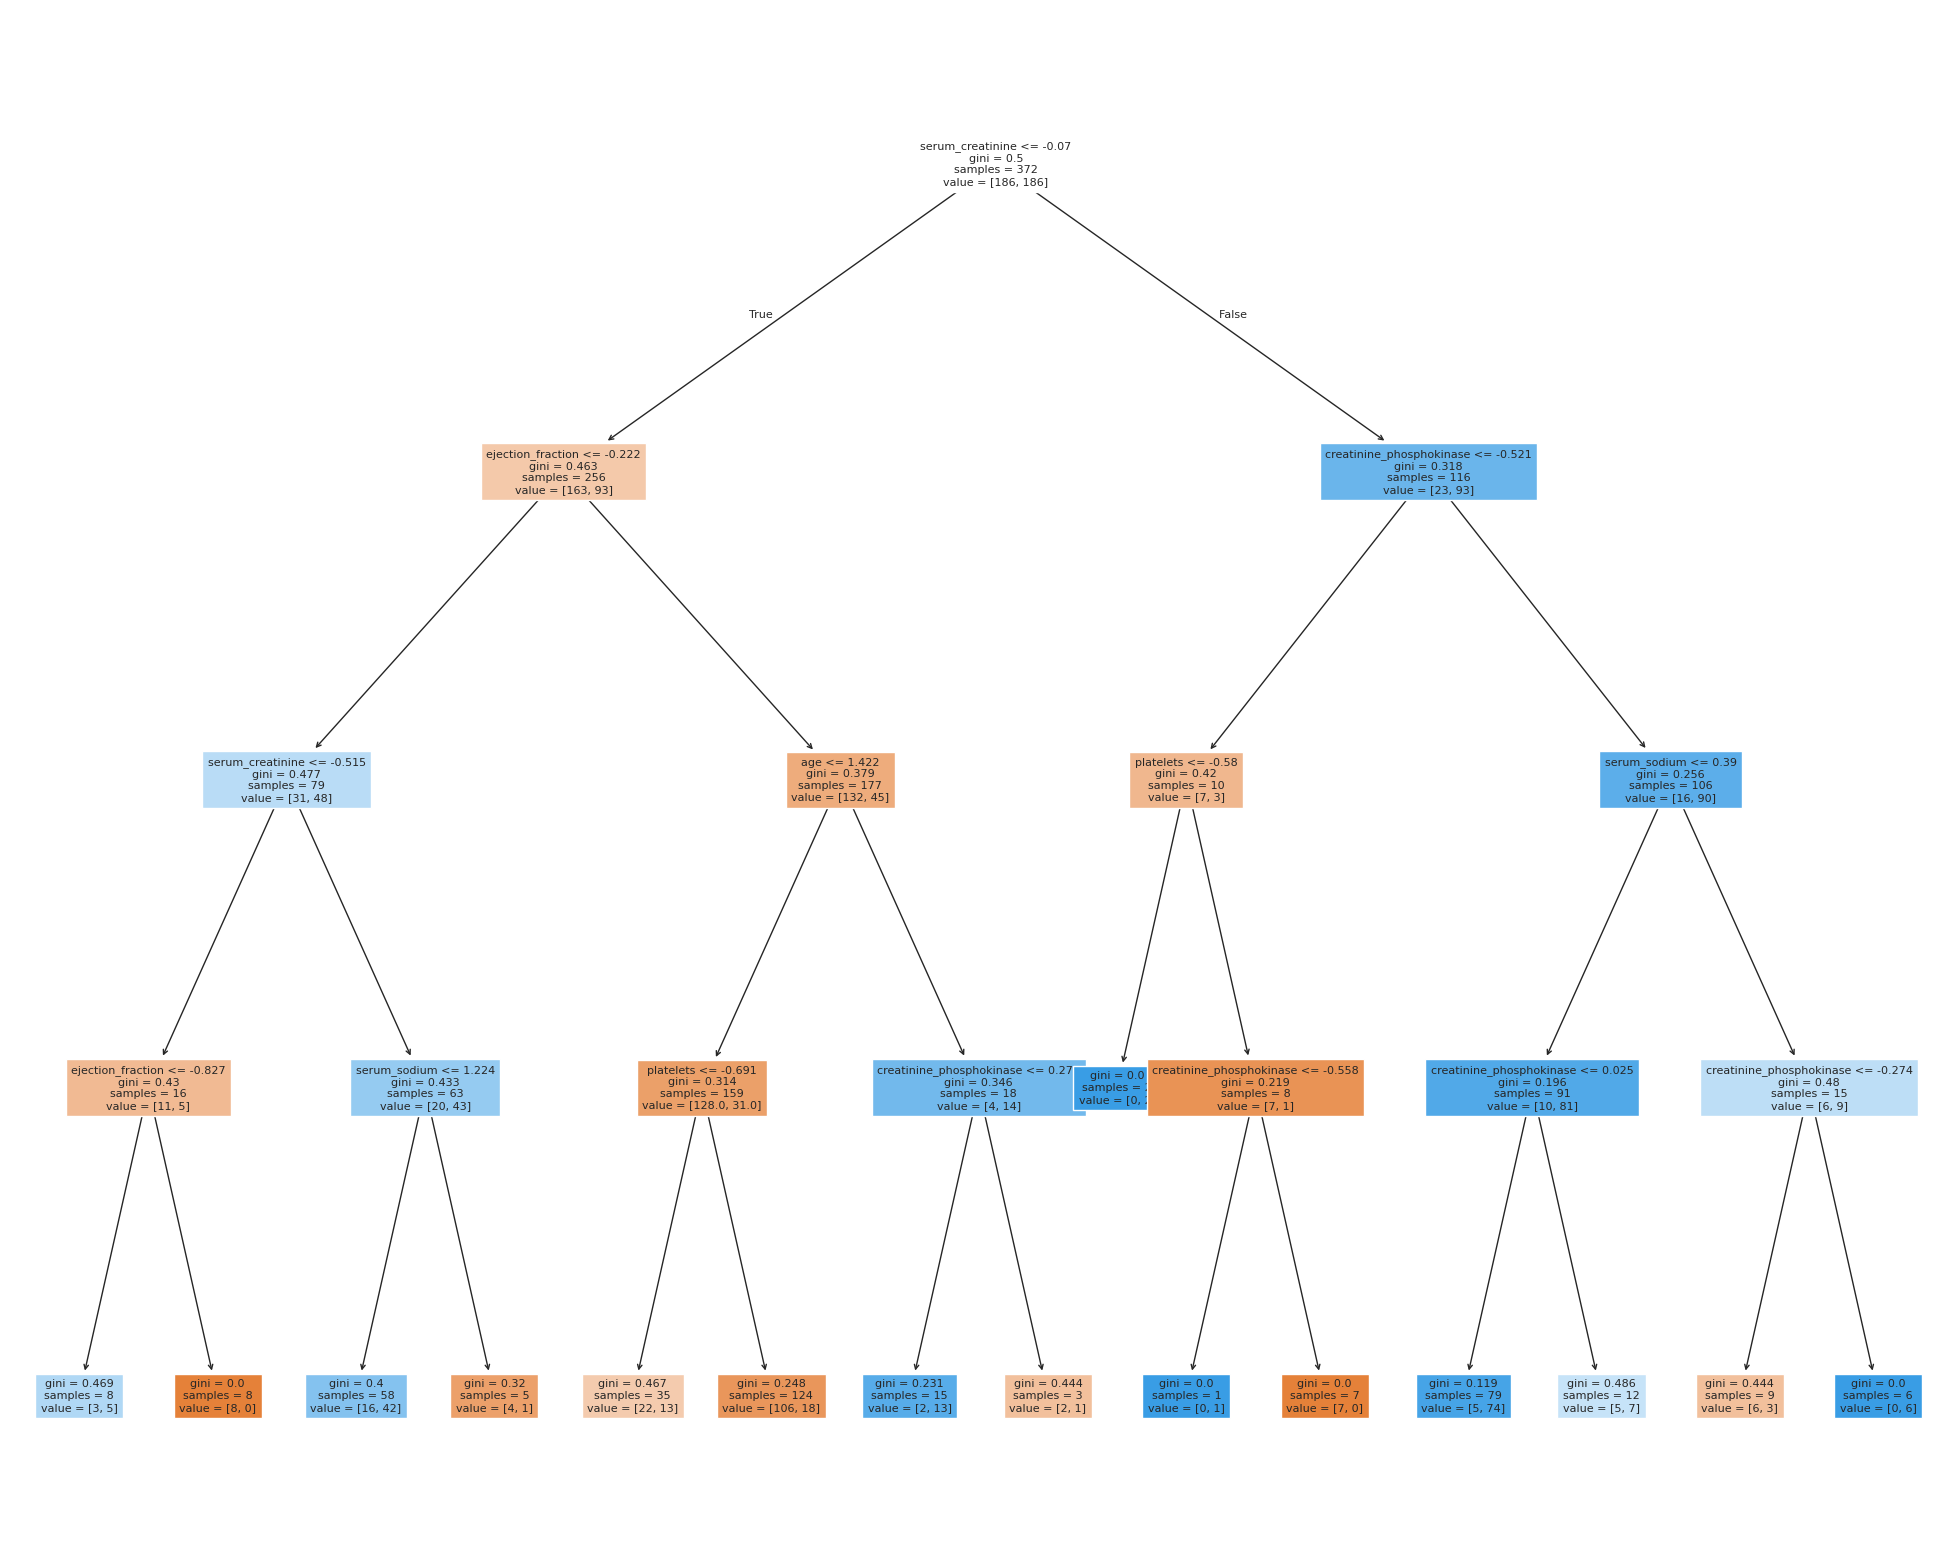

In [26]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train, y_train.values.ravel())

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_tree,
                   feature_names=data_features,
                   filled=True,
                   fontsize=8)

## Feature Importance

Data Feature Code:
------------------
0 age
1 ejection_fraction
2 serum_creatinine
3 serum_sodium
4 platelets
5 creatinine_phosphokinase

------------------------

Data Feature Importances
------------------------
Feature: 0, Score: 0.12719
Feature: 1, Score: 0.19413
Feature: 2, Score: 0.39585
Feature: 3, Score: 0.05439
Feature: 4, Score: 0.06073
Feature: 5, Score: 0.16771


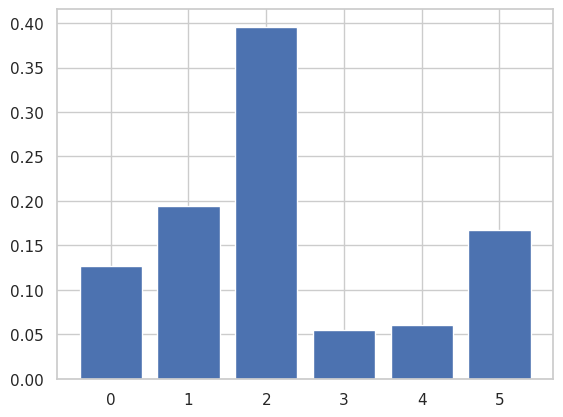

In [27]:
PrintDataFeatures(data_features=data_features)
# get importance
importance = best_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## 3. Random Forest

In [28]:
rn_forest = RandomForestClassifier(n_jobs = -1, random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 10),
#               "max_features": randint(1, 3),
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5)

# fitting the model for grid search
forest_grid.fit(X_train, y_train.values.ravel())

# get the best parameter from gird search
print("Best Parameters:", forest_grid.best_params_)

# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", forest_grid.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 34, 'min_samples_split': 70, 'n_estimators': 5000}

Best Classifier: RandomForestClassifier(bootstrap=False, max_depth=6, min_samples_leaf=34,
                       min_samples_split=70, n_estimators=5000, n_jobs=-1,
                       random_state=100)


In [29]:
# Random Forest with Best Hypertuned Parameters
best_forest = forest_grid.best_estimator_
best_forest = best_forest.fit(X_train, y_train.values.ravel())

## Feature Importances

Data Feature Code:
------------------
0 age
1 ejection_fraction
2 serum_creatinine
3 serum_sodium
4 platelets
5 creatinine_phosphokinase

------------------------

Data Feature Importances
------------------------


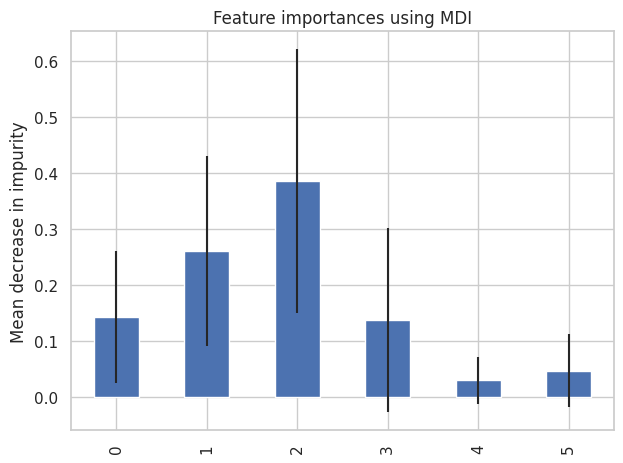

In [30]:
PrintDataFeatures(data_features=data_features)

importances = best_forest.feature_importances_
std = np.std([tree.feature_importances_
              for tree in best_forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=data_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 4. Extreme Gradient Boosting - XGBoost

In [31]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100, verbosity = 0)

param_grid = {'max_depth': range(4, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5)

# fitting the model for grid search
xgb_grid = xgb_grid.fit(X_train, y_train.values.ravel())

# get the best parameter from gird search
print("Best Parameters:", xgb_grid.best_params_)

# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", xgb_grid.best_estimator_)

Best Parameters: {'subsample': np.float64(1.0), 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 16, 'learning_rate': 0.1, 'colsample_bytree': np.float64(1.0)}

Best Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(1.0), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)


In [32]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(1.0), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)

Data Feature Code:
------------------
0 age
1 ejection_fraction
2 serum_creatinine
3 serum_sodium
4 platelets
5 creatinine_phosphokinase

------------------------

Data Feature Importances
------------------------


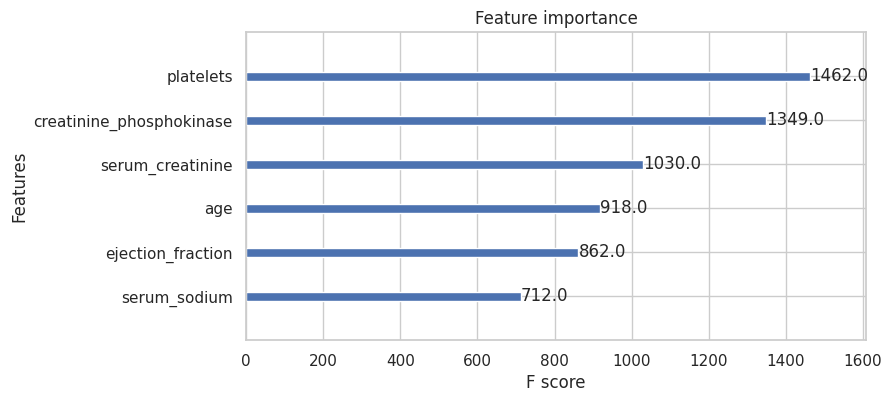

In [33]:
# plot_model_feature_importances(model = best_xgb) # this throws an error sometimes -
# AttributeError: 'XGBClassifier' object has no attribute 'feature_importances_'
# XGBoostError: need to call fit or 'load_model' beforehand
PrintDataFeatures(data_features=data_features)

from xgboost import plot_importance

ax = plot_importance(best_xgb)

# # get the original names back
yticklabels = list(ax.get_yticklabels())
dict_features = dict(enumerate(data_features))
lst_yticklabels = [ yticklabels[i].get_text().lstrip('f') for i in range(len(yticklabels))]
lst_yticklabels = [ data_features[int(i)] for i in lst_yticklabels]

ax.set_yticklabels(lst_yticklabels)
ax.figure.set_size_inches(8, 4)
plt.show()

### <font color = Green>Shap Summary Plot</font>

Data Feature Code:
------------------
0 age
1 ejection_fraction
2 serum_creatinine
3 serum_sodium
4 platelets
5 creatinine_phosphokinase

------------------------

Data Feature Importances
------------------------


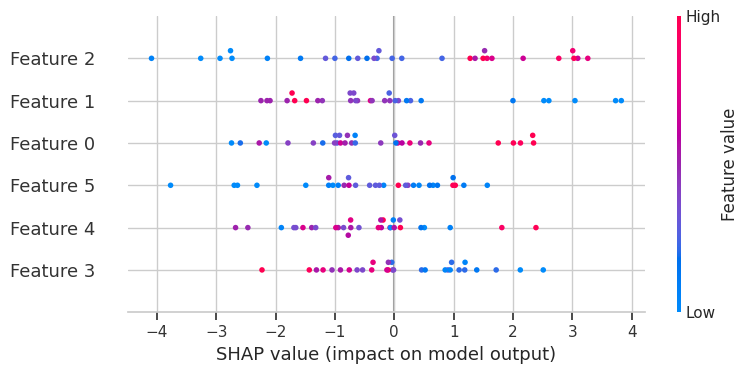

In [34]:
PrintDataFeatures(data_features=data_features)

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### <font color = Red>Insight:</font>

1. **Serum_Creatinine**: Many bright red dot cluster (high values) are seen around the [1 - 3] range in the x-axis. This means increase in value of serum_creatinine nearly doubles/triples the risk of death.
2. **Ejection_Fraction**: Though majority of subjects have ejection fraction around the normal range, a few have extremely low values, within the [1 - 3] range in the x-axis. This indicates lower than normal values of ejection_fraction nearly doubles/triples the risk of death.
3. **Age**: A few red dot cluster (high values) are seen around the [1 - 3] range in the x-axis. This means with increase in age the risk of death due to heart failure condition nearly doubles/triples.

Data Feature Code:
------------------
0 age
1 ejection_fraction
2 serum_creatinine
3 serum_sodium
4 platelets
5 creatinine_phosphokinase

------------------------

Data Feature Importances
------------------------


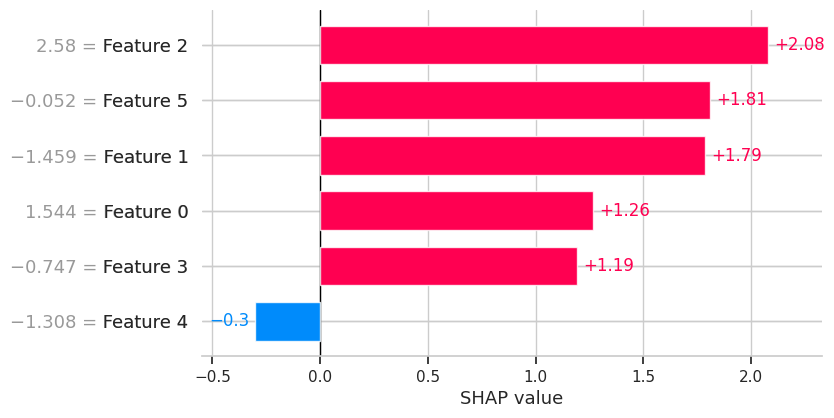

In [35]:
# compute SHAP values
PrintDataFeatures(data_features=data_features)

explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_train)
shap.plots.bar(shap_values[0])

### <font color = Red>Insight:</font>

**serum_creatinine**, **ejection_fraction**, and **age** turn out to be most important features and the death event is highly dependent on these parameters.

## 5. Light Gradient Boosted Machine (Light GBM)

In [36]:
# LGBM with Default Parameters
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
              'num_leaves': range(20, 100),
              'learning_rate': np.arange(0.1, 1.0, 0.1),
              'n_estimators': range(100, 1100, 100),
              'min_child_samples': range(1, 72),
              'subsample': np.arange(0.1, 1.1, 0.1),
              'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object
lgb_grid= RandomizedSearchCV(lgb, param_grid, cv = 5)

# fitting the model for grid search
lgb_grid = lgb_grid.fit(X_train, y_train.values.ravel())

# get the best parameter from gird search
print("Best Parameters:", lgb_grid.best_params_)

# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", lgb_grid.best_estimator_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [37]:
# LGBM with Best Hypertuned Parameters
best_lgb = lgb_grid.best_estimator_
best_lgb.fit(X_train, y_train.values.ravel())

[LightGBM] [Info] Number of positive: 186, number of negative: 186
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

LGBMClassifier(colsample_bytree=np.float64(0.9), learning_rate=np.float64(0.9),
               max_depth=24, min_child_samples=25, n_estimators=200, n_jobs=-1,
               num_leaves=28, objective='binary', random_state=100,
               subsample=np.float64(0.1))

### LGBM Feature Importance

Data Feature Code:
------------------
0 age
1 ejection_fraction
2 serum_creatinine
3 serum_sodium
4 platelets
5 creatinine_phosphokinase

------------------------

Data Feature Importances
------------------------


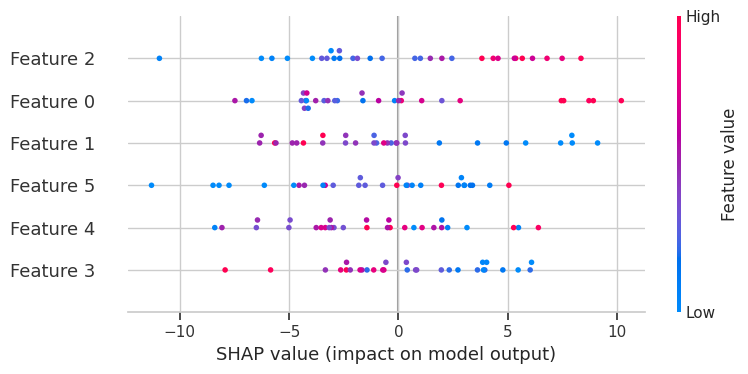

In [38]:
PrintDataFeatures(data_features=data_features)

explainer = shap.TreeExplainer(best_lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### <font color = Red>Insight:</font>

**serum_creatinine**, **ejection_fraction**, and **age** turn out to be most important features and the death event is highly dependent on these parameters.

# Inferences

**`1. 'age', 'ejection_fraction', 'serum_creatinine' seem to be the features that are more closely related to the death event.`**

**`2. The event of a heart failure in the old age could be fatal.`**

**`3. The levels of 'ejection_fraction', 'serum_creatinine', 'serum_sodium' play an important role in the event of heart failure or the abnormalities in the levels of these become an important factor in triggerring heart failure condition.`**

**`4. Random Forest, XGBoost and LightGBM turn out to be the better models in predicting the event of death given the vital parameters that effect heart failure of Cardiovascular conditions.`**

**`5. Machine Learning models can prove to be a time saving factor in predicting the event of death and can help the doctors take additional precauionary measures with critical care.`**

**`6. The imbalance in the dataset had been dealt using the SMOTE oversampling of the minority class. SMOTE balanced the no. of instances for each class but the amount of data is still limited.`**

**`7. The accuracy and model performance can be increased as more data is collected and made available for the model to train on. This data limitation, limits the model performance to some extent. As more and more data becomes available, the prediction accuracy and model's ability to act on other similar real-time data could be enhanced.`**